In [71]:
#WE WILL CALCULATE INTEGRAL USING THE MIDPOINTS OF RECTANGLES

from numpy import exp as exp
import matplotlib.pyplot as plt
import numpy as np


f = lambda x: exp(-1*(x**2))



def MidpointRectangle(f, start, end, points, plot = 1):
    deltax = (end-start)/points
    area = np.empty([points], float)
    ybars = np.empty([points], float)
    xbars = np.empty([points], float)
    for n in range(points):
        x1 = start + (n * deltax)
        xn = x1 + (deltax/2)
        area[n] = (deltax)*f(xn)
        ybars[n] = f(xn)
        xbars[n] = xn
    x = np.linspace(start,end, points)
    y = f(x)
    if plot == 1:
        plt.figure(figsize=(15,15))
        plt.xlim([start,end])
        plt.plot(x,y)
        plt.title('Midpoint Rule (Rectangles)', size = 42)
        plt.xlabel('x', size = 42)
        plt.ylabel('$e^{-x^2}$', size = 42)
        plt.bar(xbars , ybars, deltax, edgecolor = 'black', align = 'center')
        plt.show()
        print('The sum is ' , sum(area))
    


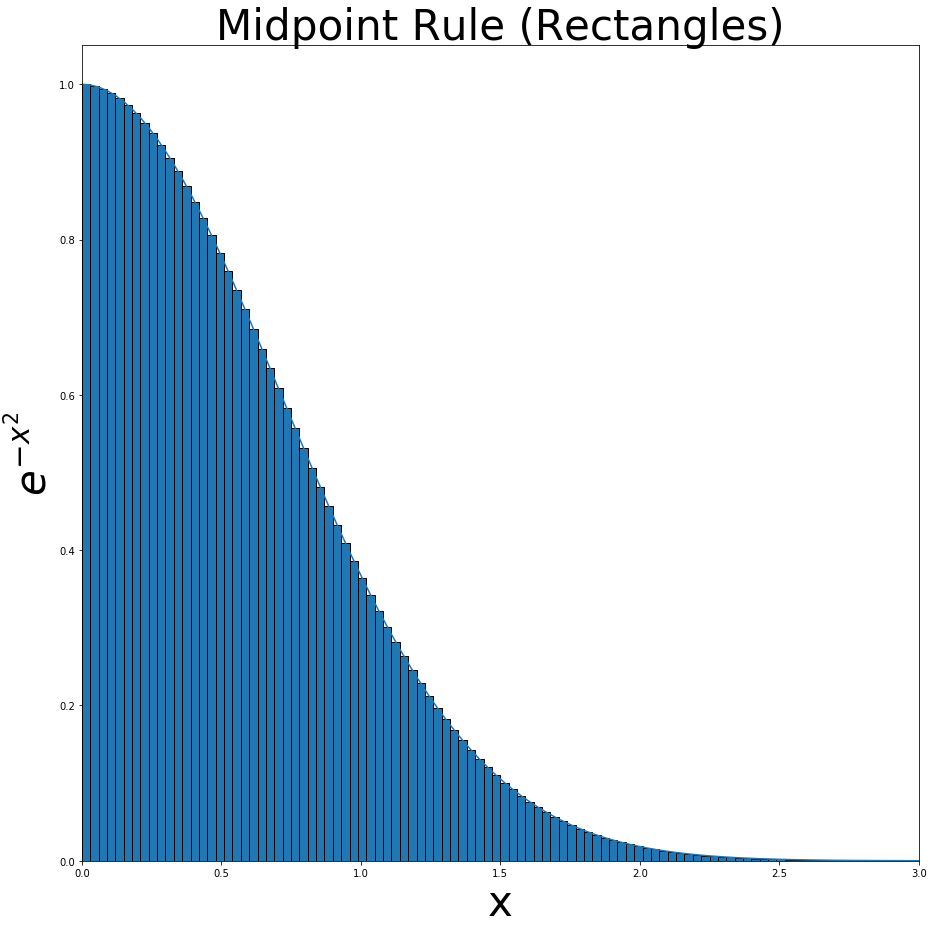

The sum is  0.8862073760048715


In [50]:
MidpointRectangle(f, 0, 3, 100)

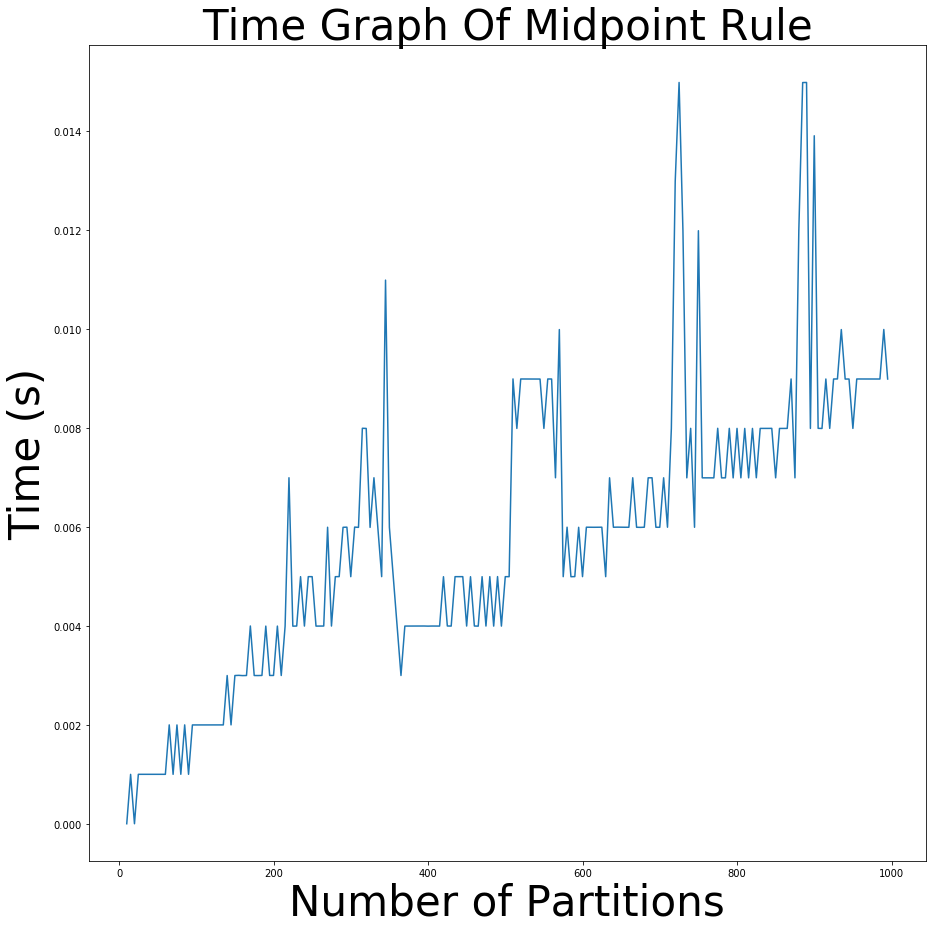

In [83]:
#WE CALCULATE TIME GRAPH FOR MIDPOINT RULE

import time


xt = range(10,1000,5)
yt = []
for i in xt:
    t1 = time.time()
    MidpointRectangle(f, 0, 3, i, 0)
    t2 = time.time()
    yt.append(t2-t1)
    
plt.figure(figsize=(15,15))
plt.plot(xt,yt)
plt.title('Time Graph Of Midpoint Rule', size = 42)
plt.xlabel('Number of Partitions', size = 42)
plt.ylabel('Time (s)', size = 42)
plt.show()

In [76]:
#WE WILL CALCULATE THE INTEGRAL USING TRAPEZOIDS

from numpy import exp as exp
import matplotlib.pyplot as plt
import numpy as np


f = lambda x: exp(-1*(x**2))



def Trapezoid(f, start, end, points, plot = 1):
    deltax = (end-start)/points
    area = np.empty([points], float)
    ybars = np.empty([points], float)
    xbars = np.empty([points], float)
    for n in range(points):
        x1 = start + (n * deltax)
        x2 = start + (n+1)*deltax
        xn = x1 + (deltax/2)
        area[n] = (deltax/2)*(f(x1)+f(x2))
        ybars[n] = f(xn)
        xbars[n] = xn
    x = np.linspace(start,end, points + 1)
    y = f(x)
    
    if plot == 1:
        plt.figure(figsize=(15,15))
        plt.xlim([start,end])
        plt.plot(x,y,'r')
        y2 = np.array([0,0])
        plt.title('Trapezoid Rule', size = 42)
        plt.xlabel('x',size = 42)
        plt.ylabel('$e^{-x^2}$', size = 42)
        for i in range(points):
            x0 = x[i:i+2]
            y1 = y[i:i+2]
            plt.fill_between(x0, y1, y2, where=y1>=y2, facecolor='blue')
            linex, liney = [x[i+1], x[i+1]], [0, y[i+1]]
            plt.plot(linex, liney, color='black', linewidth=2.0) 
        plt.show()
        print('The sum is ' , sum(area))

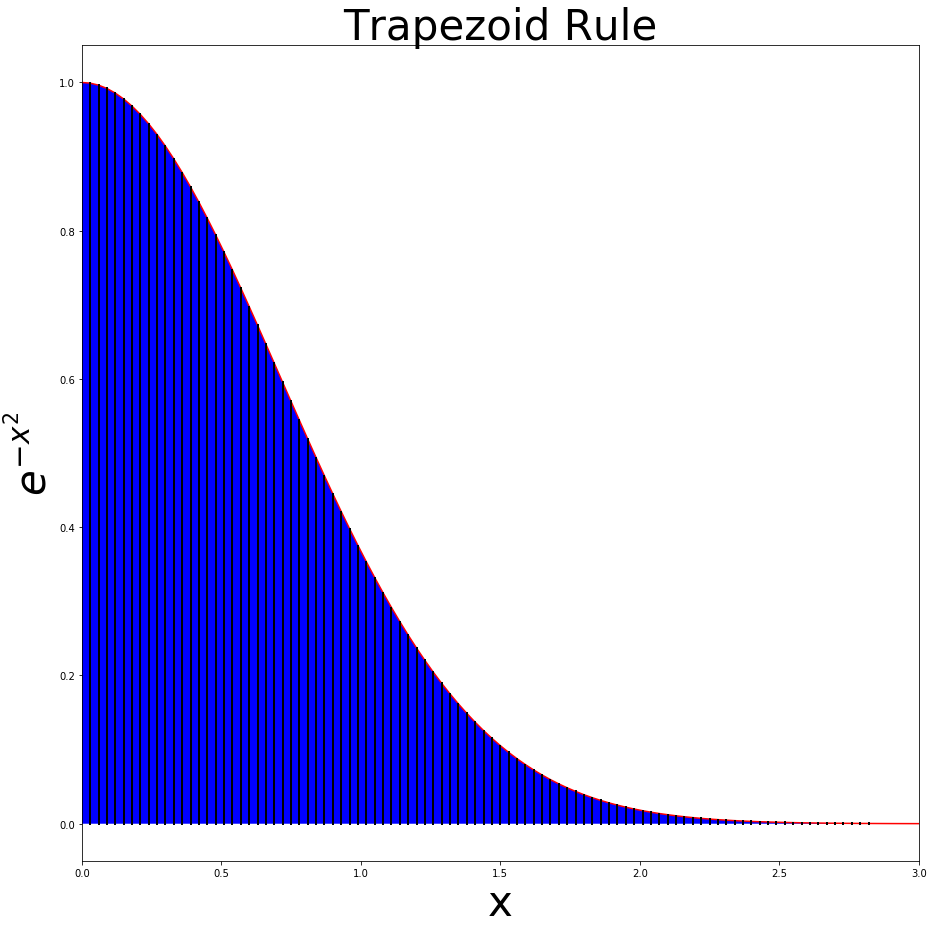

The sum is  0.8862072927500886


In [56]:
Trapezoid(f,0,3,100)

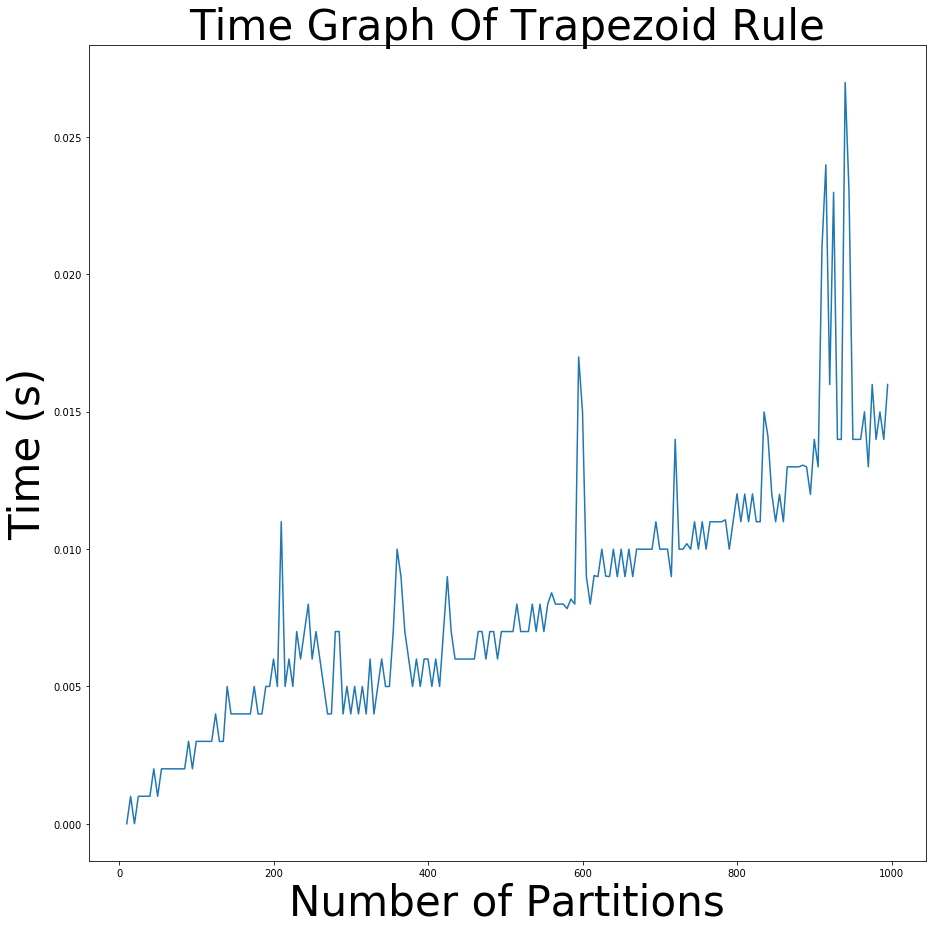

In [82]:
#WE CALCULATE THE TIME GRAPH FOR TRAPEZOIDAL RULE

import time


xt = range(10,1000,5)
yt = []
for i in xt:
    t1 = time.time()
    Trapezoid(f, 0, 3, i, 0)
    t2 = time.time()
    yt.append(t2-t1)
    
plt.figure(figsize=(15,15))
plt.plot(xt,yt)
plt.title('Time Graph Of Trapezoid Rule', size = 42)
plt.xlabel('Number of Partitions', size = 42)
plt.ylabel('Time (s)', size = 42)
plt.show()

In [78]:
#WE WILL CALCULATE INTEGRAL USING SIMPSON'S RULE

from numpy import exp as exp
import matplotlib.pyplot as plt
import numpy as np


f = lambda x: exp(-1*(x**2))



def Simpson(f, start, end, points, plot = 1):
    deltax = (end-start)/points
    area = np.empty([points], float)
    x = np.linspace(start,end, points + 1)
    y = f(x)
    for n in range(points):
        if n == 0:
            area[n] = f(x[n])
        elif n == points:
            area[n] = f(x[points])
        elif n % 2 == 1:
            area[n] = 4*f(x[n])
        elif n % 2 == 0:
            area[n] = 2*f(x[n])
    
    
    if plot == 1:
        y0 = np.zeros(points+1)
        plt.figure(figsize=(15,15))
        plt.xlim([start,end])
        plt.plot(x,y)
        plt.title('Simpson\'s Rule', size = 42)
        plt.xlabel('x', size = 42)
        plt.ylabel('$e^{-x^2}$',size = 42)
        plt.fill_between(x, y0, y, where=y>=y0, facecolor='pink')
        plt.show()
        print('The sum is ' , (deltax/3)*sum(area))

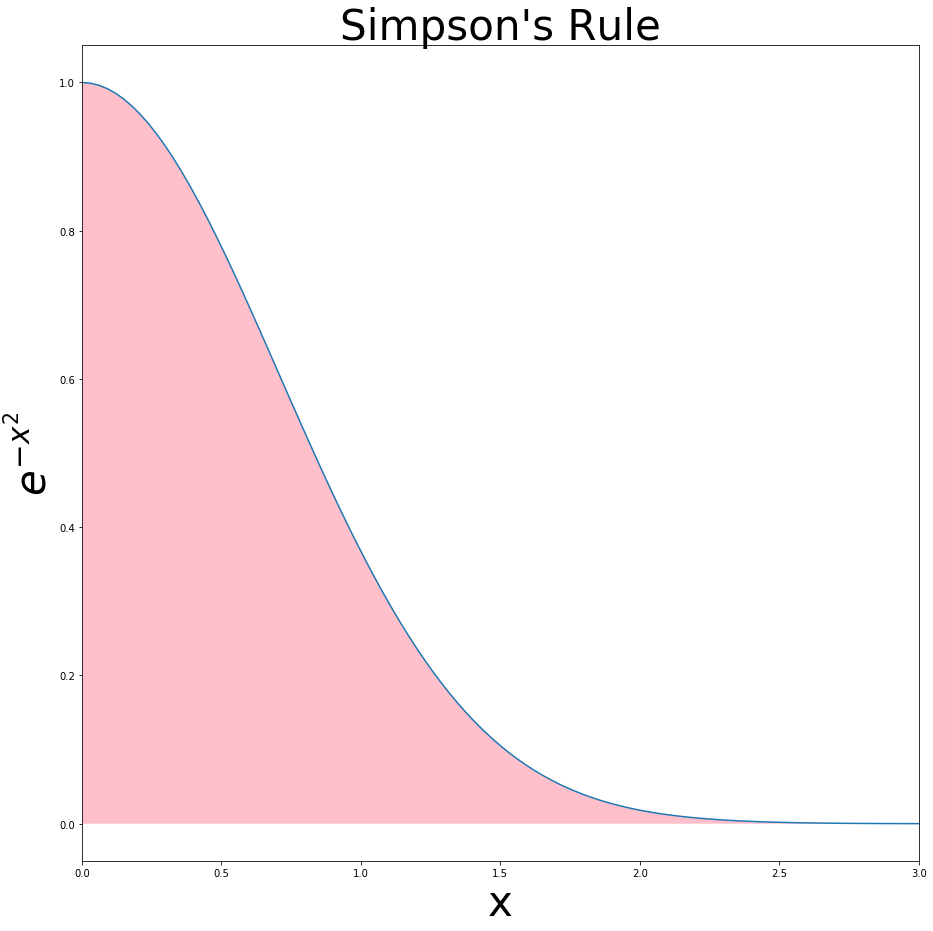

The sum is  0.8862061140617453


In [66]:
Simpson(f, 0, 3, 100)

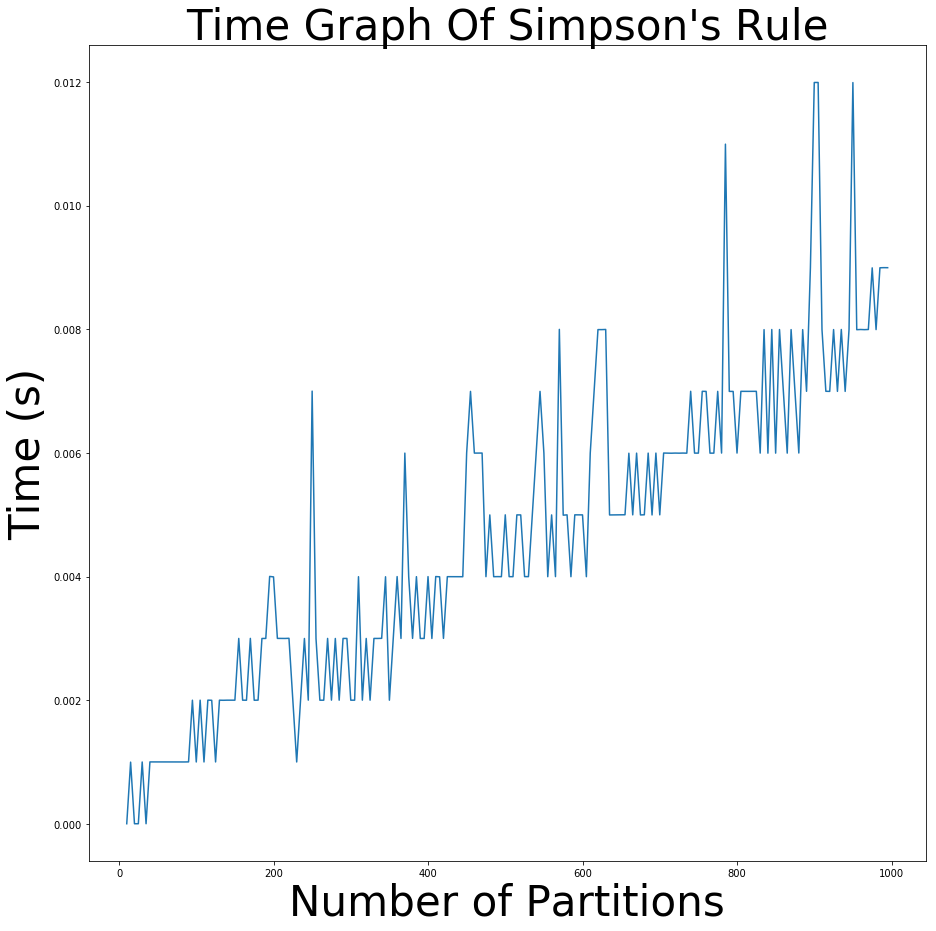

In [81]:
#WE CALCULATE THE TIME GRAPH OF SIMPSON'S RULE

import time


xt = range(10,1000,5)
yt = []
for i in xt:
    t1 = time.time()
    Simpson(f, 0, 3, i, 0)
    t2 = time.time()
    yt.append(t2-t1)

plt.figure(figsize=(15,15))
plt.plot(xt,yt)
plt.title('Time Graph Of Simpson\'s Rule', size = 42)
plt.xlabel('Number of Partitions', size = 42)
plt.ylabel('Time (s)', size = 42)
plt.show()